In [1]:
"""
Exploración de Datos de StatsBomb para Análisis Táctico
"""

import sys
sys.path.append('..')  # Para importar desde src/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsbombpy import sb

# Importar nuestro loader
from src.data.loader import StatsBombLoader

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


In [2]:
# Inicializar loader
loader = StatsBombLoader()

# Ver todas las competiciones
competitions = loader.get_competitions()

print(f"📊 Total de competiciones disponibles: {len(competitions)}\n")
print("Competiciones principales:")
print(competitions[['competition_name', 'season_name', 'competition_id', 'season_id']].head(15))

C:\Users\xurzy\Desktop\TFG\tfg-football-tactical-modeling\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


📊 Total de competiciones disponibles: 75

Competiciones principales:
          competition_name season_name  competition_id  season_id
0            1. Bundesliga   2023/2024               9        281
1            1. Bundesliga   2015/2016               9         27
2   African Cup of Nations        2023            1267        107
3         Champions League   2018/2019              16          4
4         Champions League   2017/2018              16          1
5         Champions League   2016/2017              16          2
6         Champions League   2015/2016              16         27
7         Champions League   2014/2015              16         26
8         Champions League   2013/2014              16         25
9         Champions League   2012/2013              16         24
10        Champions League   2011/2012              16         23
11        Champions League   2010/2011              16         22
12        Champions League   2009/2010              16         21
13     

In [3]:
# La Liga 2020/2021 (competition_id=11, season_id=90)
print("⚽ Cargando partidos de La Liga 2020/2021...\n")

matches = loader.get_matches(competition_id=11, season_id=90)

print(f"Total de partidos: {len(matches)}\n")
print("Primeros 10 partidos:")
print(matches[['match_date', 'home_team', 'away_team', 'home_score', 'away_score']].head(10))

⚽ Cargando partidos de La Liga 2020/2021...



C:\Users\xurzy\Desktop\TFG\tfg-football-tactical-modeling\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


✅ Partidos guardados en: data/raw/matches_11_90.csv
Total de partidos: 35

Primeros 10 partidos:
   match_date         home_team    away_team  home_score  away_score
0  2020-10-31  Deportivo Alavés    Barcelona           1           1
1  2021-01-09           Granada    Barcelona           0           4
2  2021-05-16         Barcelona   Celta Vigo           1           2
3  2021-02-07        Real Betis    Barcelona           2           3
4  2021-03-06           Osasuna    Barcelona           0           2
5  2021-04-10       Real Madrid    Barcelona           2           1
6  2020-12-13         Barcelona   Levante UD           1           0
7  2020-09-27         Barcelona   Villarreal           4           0
8  2020-10-01        Celta Vigo    Barcelona           0           3
9  2020-10-24         Barcelona  Real Madrid           1           3


In [4]:
# Seleccionar el primer partido de Barcelona
barcelona_matches = matches[
    (matches['home_team'] == 'Barcelona') | 
    (matches['away_team'] == 'Barcelona')
]

print(f"Partidos de Barcelona disponibles: {len(barcelona_matches)}\n")

# Tomar el primer partido
match_id = barcelona_matches.iloc[0]['match_id']
match_info = barcelona_matches.iloc[0]

print(f"🎯 Partido seleccionado:")
print(f"   Fecha: {match_info['match_date']}")
print(f"   {match_info['home_team']} {match_info['home_score']} - {match_info['away_score']} {match_info['away_team']}")
print(f"   Match ID: {match_id}")

Partidos de Barcelona disponibles: 35

🎯 Partido seleccionado:
   Fecha: 2020-10-31
   Deportivo Alavés 1 - 1 Barcelona
   Match ID: 3773386


In [5]:
# Cargar eventos completos y pases
events, passes = loader.load_match_data(match_id)

print(f"\n📋 Columnas disponibles en eventos ({len(events.columns)} columnas):")
print(events.columns.tolist())

C:\Users\xurzy\Desktop\TFG\tfg-football-tactical-modeling\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


✅ Eventos guardados en: data/raw/events_3773386.csv
📊 Partido 3773386:
   - Total eventos: 3891
   - Total pases: 1118

📋 Columnas disponibles en eventos (92 columnas):
['50_50', 'bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive', 'ball_recovery_recovery_failure', 'carry_end_location', 'clearance_aerial_won', 'clearance_body_part', 'clearance_head', 'clearance_left_foot', 'clearance_right_foot', 'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage', 'foul_committed_card', 'foul_committed_offensive', 'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location', 'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id', 'pass

📊 Distribución de tipos de eventos:

type
Pass             1118
Ball Receipt*    1059
Carry             888
Pressure          307
Ball Recovery      99
Duel               63
Dribble            40
Clearance          39
Block              39
Goal Keeper        35
Dispossessed       29
Shot               29
Foul Won           26
Miscontrol         26
Dribbled Past      26
Name: count, dtype: int64


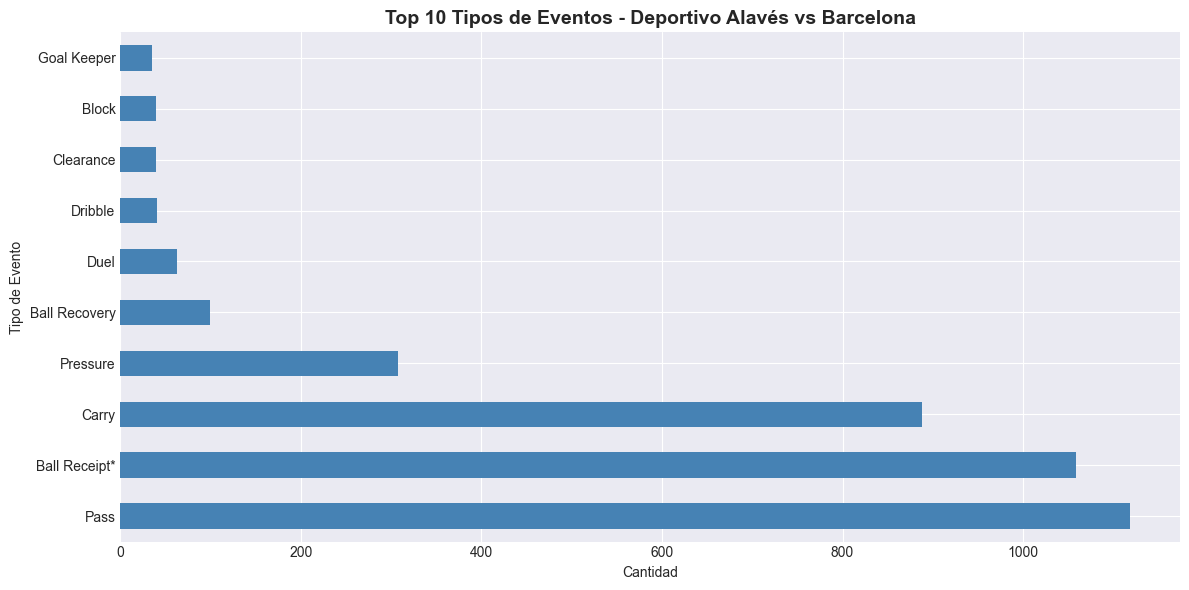

In [6]:
# Distribución de tipos de eventos
event_types = events['type'].value_counts()

print("📊 Distribución de tipos de eventos:\n")
print(event_types.head(15))

# Visualización
plt.figure(figsize=(12, 6))
event_types.head(10).plot(kind='barh', color='steelblue')
plt.title(f'Top 10 Tipos de Eventos - {match_info["home_team"]} vs {match_info["away_team"]}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Evento')
plt.tight_layout()
plt.show()

In [7]:
print(f"🎯 Análisis de {len(passes)} pases\n")

# Columnas importantes de pases
pass_columns = ['team', 'player', 'pass_recipient', 'minute', 'second', 
                'location', 'pass_end_location', 'pass_outcome', 'pass_type']

available_cols = [col for col in pass_columns if col in passes.columns]
print("Columnas de pases disponibles:")
print(available_cols)

print("\n📋 Primeros 10 pases:")
print(passes[available_cols].head(10))

# Estadísticas de pases
print(f"\n📊 Estadísticas de pases:")
print(f"   - Pases totales: {len(passes)}")
print(f"   - Pases completos: {passes['pass_outcome'].isna().sum()}")
print(f"   - Pases fallados: {passes['pass_outcome'].notna().sum()}")

if 'pass_outcome' in passes.columns:
    pass_accuracy = (passes['pass_outcome'].isna().sum() / len(passes)) * 100
    print(f"   - Precisión de pase: {pass_accuracy:.2f}%")

🎯 Análisis de 1118 pases

Columnas de pases disponibles:
['team', 'player', 'pass_recipient', 'minute', 'second', 'location', 'pass_end_location', 'pass_outcome', 'pass_type']

📋 Primeros 10 pases:
         team                    player            pass_recipient  minute  \
6   Barcelona         Antoine Griezmann  Sergio Busquets i Burgos       0   
7   Barcelona  Sergio Busquets i Burgos           Frenkie de Jong       0   
8   Barcelona           Frenkie de Jong     Gerard Piqué Bernabéu       0   
9   Barcelona     Gerard Piqué Bernabéu           Clément Lenglet       0   
10  Barcelona           Clément Lenglet  Sergio Busquets i Burgos       0   
11  Barcelona  Sergio Busquets i Burgos     Gerard Piqué Bernabéu       0   
12  Barcelona     Gerard Piqué Bernabéu           Clément Lenglet       0   
13  Barcelona           Clément Lenglet          Jordi Alba Ramos       0   
14  Barcelona          Jordi Alba Ramos  Sergio Busquets i Burgos       0   
15  Barcelona  Sergio Busquets i

⚽ Pases por equipo:

team
Barcelona           880
Deportivo Alavés    238
dtype: int64


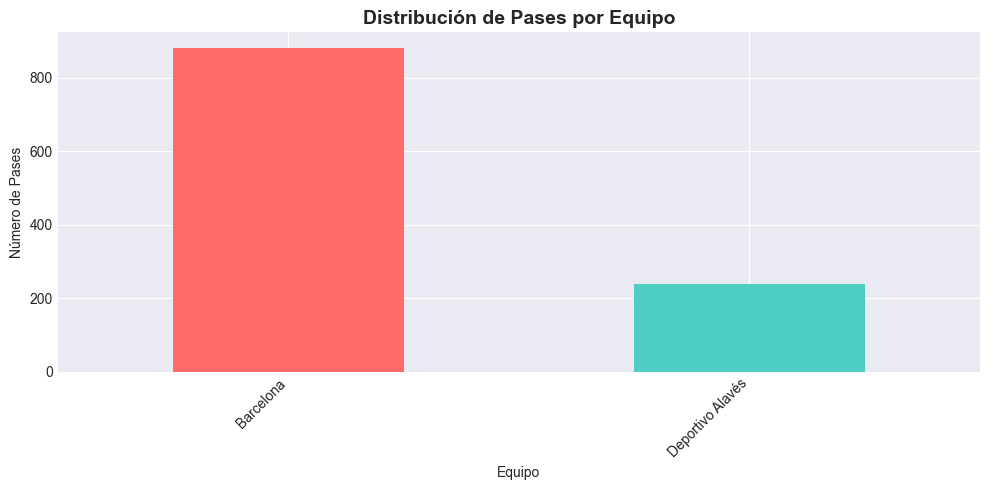

In [8]:
# Análisis por equipo
passes_by_team = passes.groupby('team').size()

print("⚽ Pases por equipo:\n")
print(passes_by_team)

# Visualización
plt.figure(figsize=(10, 5))
passes_by_team.plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])
plt.title('Distribución de Pases por Equipo', fontsize=14, fontweight='bold')
plt.xlabel('Equipo')
plt.ylabel('Número de Pases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

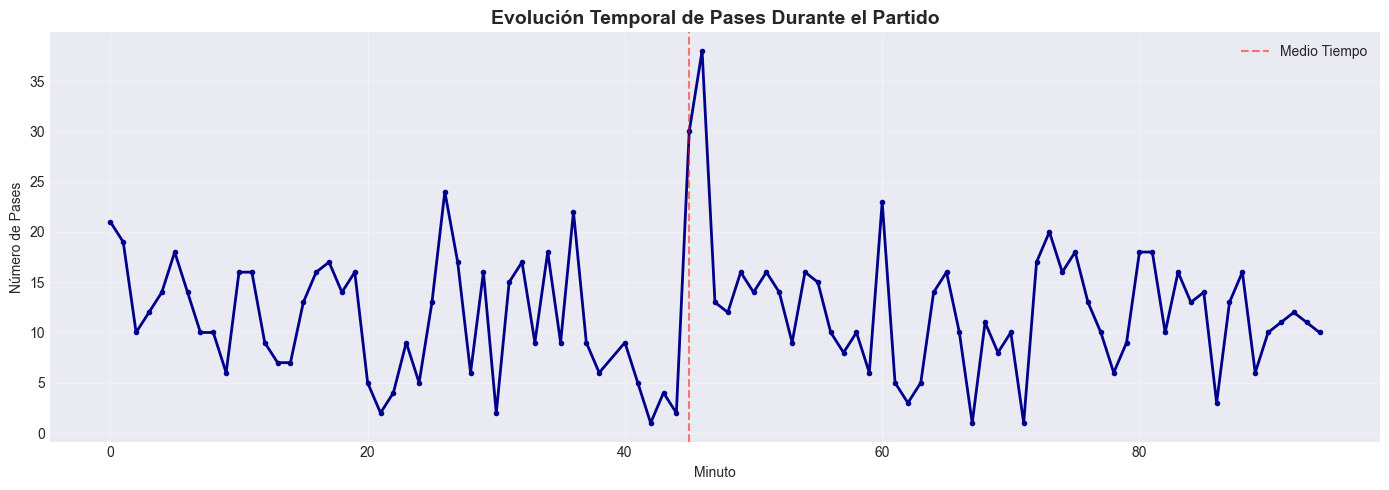


📈 Estadísticas temporales:
   - Minuto con más pases: 46 (38 pases)
   - Minuto con menos pases: 42 (1 pases)
   - Promedio por minuto: 11.89 pases


In [9]:
# Pases por minuto
if 'minute' in passes.columns:
    passes_per_minute = passes.groupby('minute').size()
    
    plt.figure(figsize=(14, 5))
    passes_per_minute.plot(kind='line', linewidth=2, color='darkblue', marker='o', markersize=3)
    plt.title('Evolución Temporal de Pases Durante el Partido', fontsize=14, fontweight='bold')
    plt.xlabel('Minuto')
    plt.ylabel('Número de Pases')
    plt.grid(True, alpha=0.3)
    plt.axvline(x=45, color='red', linestyle='--', alpha=0.5, label='Medio Tiempo')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 Estadísticas temporales:")
    print(f"   - Minuto con más pases: {passes_per_minute.idxmax()} ({passes_per_minute.max()} pases)")
    print(f"   - Minuto con menos pases: {passes_per_minute.idxmin()} ({passes_per_minute.min()} pases)")
    print(f"   - Promedio por minuto: {passes_per_minute.mean():.2f} pases")

In [10]:
# Conexiones entre jugadores (red de pases básica)
if 'player' in passes.columns and 'pass_recipient' in passes.columns:
    # Limpiar datos
    pass_network = passes[['player', 'pass_recipient', 'team']].dropna()
    
    # Contar conexiones
    connections = pass_network.groupby(['player', 'pass_recipient']).size().reset_index(name='count')
    connections = connections.sort_values('count', ascending=False)
    
    print("🔗 Top 15 conexiones de pases (jugador → receptor):\n")
    print(connections.head(15))
    
    print(f"\n📊 Resumen de la red:")
    print(f"   - Jugadores únicos: {pass_network['player'].nunique()}")
    print(f"   - Receptores únicos: {pass_network['pass_recipient'].nunique()}")
    print(f"   - Conexiones únicas: {len(connections)}")

🔗 Top 15 conexiones de pases (jugador → receptor):

                                               player  \
79                              Gerard Piqué Bernabéu   
88                              Gerard Piqué Bernabéu   
204                            Sergi Roberto Carnicer   
206                            Sergi Roberto Carnicer   
211                            Sergi Roberto Carnicer   
68                                    Frenkie de Jong   
81                              Gerard Piqué Bernabéu   
72                                    Frenkie de Jong   
157                                    Miralem Pjanić   
154                                    Miralem Pjanić   
62   Francisco António Machado Mota de Castro Trincão   
126                    Lionel Andrés Messi Cuccittini   
160                                    Miralem Pjanić   
182                              Pedro González López   
26                                    Clément Lenglet   

                                   

In [11]:
print("=" * 60)
print("✅ RESUMEN DE LA EXPLORACIÓN")
print("=" * 60)
print(f"\n📊 Datos cargados:")
print(f"   - Competición: La Liga 2020/2021")
print(f"   - Total de partidos: {len(matches)}")
print(f"   - Partido analizado: {match_info['home_team']} vs {match_info['away_team']}")
print(f"   - Eventos totales: {len(events)}")
print(f"   - Pases analizados: {len(passes)}")


print("\n💾 Archivos guardados en data/raw/")
print("=" * 60)

✅ RESUMEN DE LA EXPLORACIÓN

📊 Datos cargados:
   - Competición: La Liga 2020/2021
   - Total de partidos: 35
   - Partido analizado: Deportivo Alavés vs Barcelona
   - Eventos totales: 3891
   - Pases analizados: 1118

💾 Archivos guardados en data/raw/


In [12]:
from src.data.preprocessing import PassPreprocessor, save_processed_passes

# Inicializar preprocessor
preprocessor = PassPreprocessor(min_pass_length=1.0, max_pass_length=100.0)

# Ejecutar pipeline completo
passes_clean = preprocessor.preprocess_full_pipeline(events)

# Ver resumen
preprocessor.print_summary(passes_clean)


🧹 INICIANDO PIPELINE DE PREPROCESAMIENTO

📊 Eventos totales: 3891
✅ Pases encontrados: 1118
🧹 Pases después de eliminar nulos en player/team: 1118
✅ Precisión de pase: 83.90%
🧹 Pases después de filtrar por distancia: 1118 (eliminados: 0)
✅ Normalización temporal completada
🧹 Pases con receptor válido: 1060 (eliminados: 58)

✅ PREPROCESAMIENTO COMPLETADO: 1060 pases válidos


📊 RESUMEN DE DATOS PREPROCESADOS
Total de pases: 1060
Pases exitosos: 938
Precisión: 88.49%
Jugadores únicos: 32
Receptores únicos: 31
Equipos: Barcelona, Deportivo Alavés

Distancia de pases:
  - Promedio: 17.43m
  - Mínima: 1.50m
  - Máxima: 88.40m



In [13]:
# Comparación antes y después del preprocesamiento
print("📊 COMPARACIÓN ANTES/DESPUÉS DEL PREPROCESAMIENTO")
print("="*60)
print(f"Pases originales: {len(passes)}")
print(f"Pases preprocesados: {len(passes_clean)}")
print(f"Pases eliminados: {len(passes) - len(passes_clean)} ({((len(passes) - len(passes_clean))/len(passes)*100):.2f}%)")
print("="*60)

# Columnas añadidas
new_columns = set(passes_clean.columns) - set(passes.columns)
print(f"\n✨ Nuevas columnas añadidas: {new_columns}")

# Muestra de datos limpios
print("\n📋 Muestra de datos preprocesados:")
display_cols = ['player', 'pass_recipient', 'minute', 'pass_success', 'pass_distance', 'timestamp']
available = [col for col in display_cols if col in passes_clean.columns]
passes_clean[available].head(10)

📊 COMPARACIÓN ANTES/DESPUÉS DEL PREPROCESAMIENTO
Pases originales: 1118
Pases preprocesados: 1060
Pases eliminados: 58 (5.19%)

✨ Nuevas columnas añadidas: {'half', 'pass_success', 'pass_distance'}

📋 Muestra de datos preprocesados:


,player,pass_recipient,minute,pass_success,pass_distance,timestamp
0,Antoine Griezmann,Sergio Busquets i Burgos,0,1,12.210242,0
1,Sergio Busquets i Burgos,Frenkie de Jong,0,1,15.471910,1
2,Frenkie de Jong,Gerard Piqué Bernabéu,0,1,24.489998,5
3,Gerard Piqué Bernabéu,Clément Lenglet,0,1,20.763911,10
4,Clément Lenglet,Sergio Busquets i Burgos,0,1,10.023971,14
5,Sergio Busquets i Burgos,Gerard Piqué Bernabéu,0,1,23.129418,15
6,Gerard Piqué Bernabéu,Clément Lenglet,0,1,24.148085,20
7,Clément Lenglet,Jordi Alba Ramos,0,1,16.707483,23
8,Jordi Alba Ramos,Sergio Busquets i Burgos,0,1,14.483784,25
9,Sergio Busquets i Burgos,Sergi Roberto Carnicer,0,1,33.092748,27


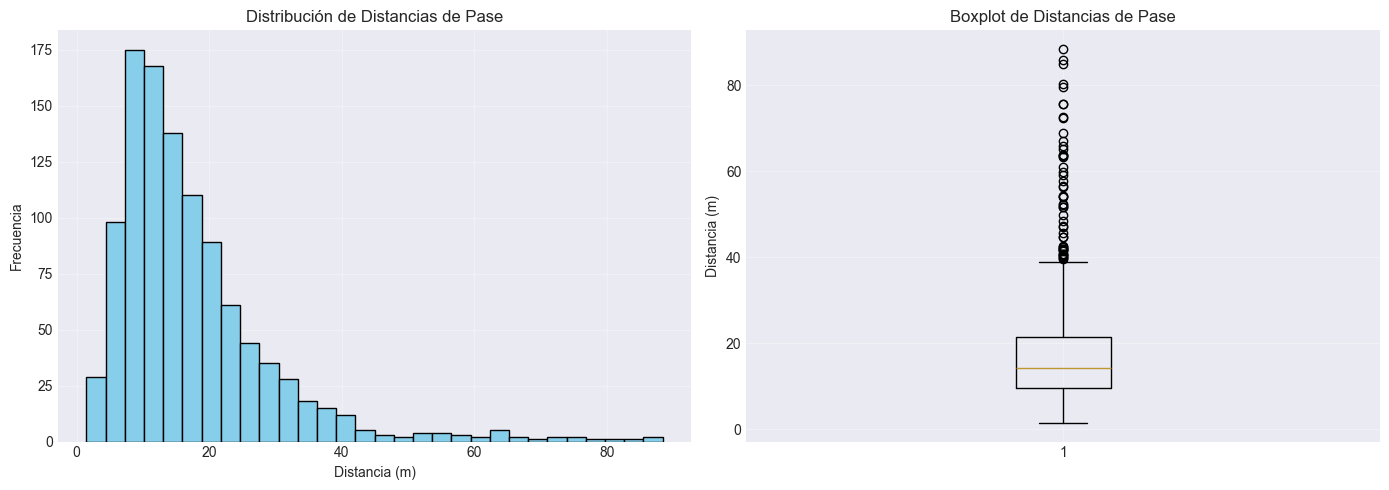

📊 Estadísticas de distancia:
count    1060.000000
mean       17.428098
std        12.050663
min         1.500000
25%         9.685003
50%        14.243236
75%        21.413313
max        88.395588
Name: pass_distance, dtype: float64


In [14]:
# Visualizar distribución de distancias de pase
if 'pass_distance' in passes_clean.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histograma
    axes[0].hist(passes_clean['pass_distance'], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_xlabel('Distancia (m)')
    axes[0].set_ylabel('Frecuencia')
    axes[0].set_title('Distribución de Distancias de Pase')
    axes[0].grid(True, alpha=0.3)
    
    # Boxplot
    axes[1].boxplot(passes_clean['pass_distance'], vert=True)
    axes[1].set_ylabel('Distancia (m)')
    axes[1].set_title('Boxplot de Distancias de Pase')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"📊 Estadísticas de distancia:")
    print(passes_clean['pass_distance'].describe())

In [15]:
# Guardar datos preprocesados
save_processed_passes(passes_clean, f'data/processed/passes_match_{match_id}.csv')

print(f"✅ Datos preprocesados guardados exitosamente")
print(f"📁 Ubicación: data/processed/passes_match_{match_id}.csv")

💾 Datos guardados en: data/processed/passes_match_3773386.csv
✅ Datos preprocesados guardados exitosamente
📁 Ubicación: data/processed/passes_match_3773386.csv


In [16]:
from src.graphs.pass_graph import PassGraph

# Construir grafo para Barcelona
pass_graph = PassGraph(weight_type='frequency')
G = pass_graph.build_graph(passes_clean, team='Barcelona')

# Resumen
pass_graph.print_summary()


🔨 Construyendo grafo de pases (peso: frequency)...
   Filtrando equipo: Barcelona
✅ Grafo construido:
   - Nodos (jugadores): 16
   - Aristas (conexiones): 152

📊 RESUMEN DEL GRAFO
Nodos (jugadores): 16
Aristas (conexiones): 152
Densidad: 0.6333
Grado promedio: 19.00
Conectado: Sí
Componentes: 1



🔗 Top 15 conexiones de pases:
                                                 from  \
44                              Gerard Piqué Bernabéu   
53                              Gerard Piqué Bernabéu   
104                            Sergi Roberto Carnicer   
106                            Sergi Roberto Carnicer   
111                            Sergi Roberto Carnicer   
33                                    Frenkie de Jong   
46                              Gerard Piqué Bernabéu   
37                                    Frenkie de Jong   
86                                     Miralem Pjanić   
83                                     Miralem Pjanić   
27   Francisco António Machado Mota de Castro Trincão   
68                     Lionel Andrés Messi Cuccittini   
99                               Pedro González López   
89                                     Miralem Pjanić   
74                     Lionel Andrés Messi Cuccittini   

                                                   to  we

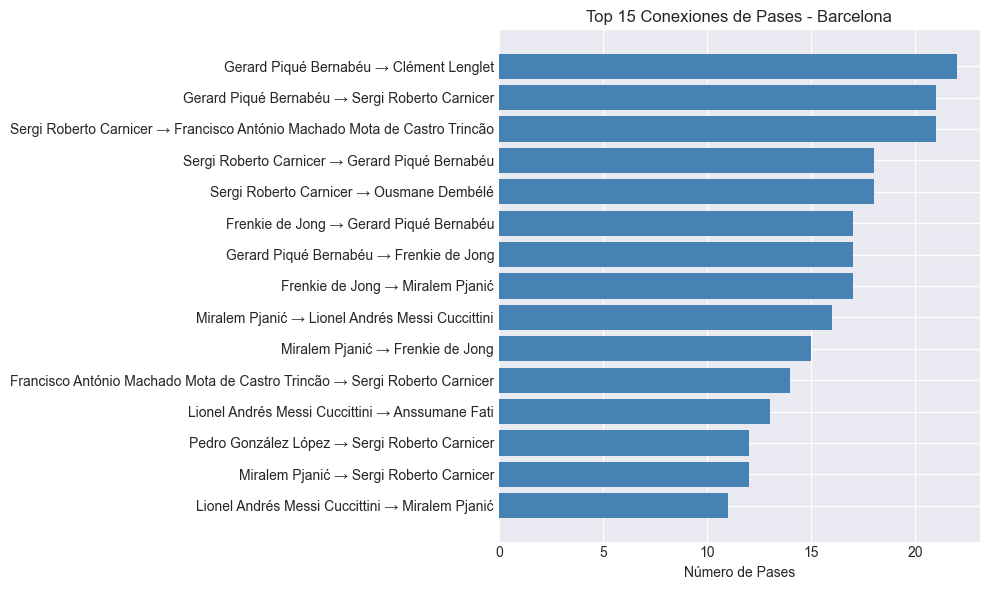

In [17]:
# Ver las conexiones más fuertes
top_connections = pass_graph.get_top_connections(15)
print("🔗 Top 15 conexiones de pases:")
print(top_connections)

# Visualizar como barras
plt.figure(figsize=(10, 6))
top_connections['connection'] = top_connections['from'] + ' → ' + top_connections['to']
plt.barh(top_connections['connection'], top_connections['weight'], color='steelblue')
plt.xlabel('Número de Pases')
plt.title('Top 15 Conexiones de Pases - Barcelona')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

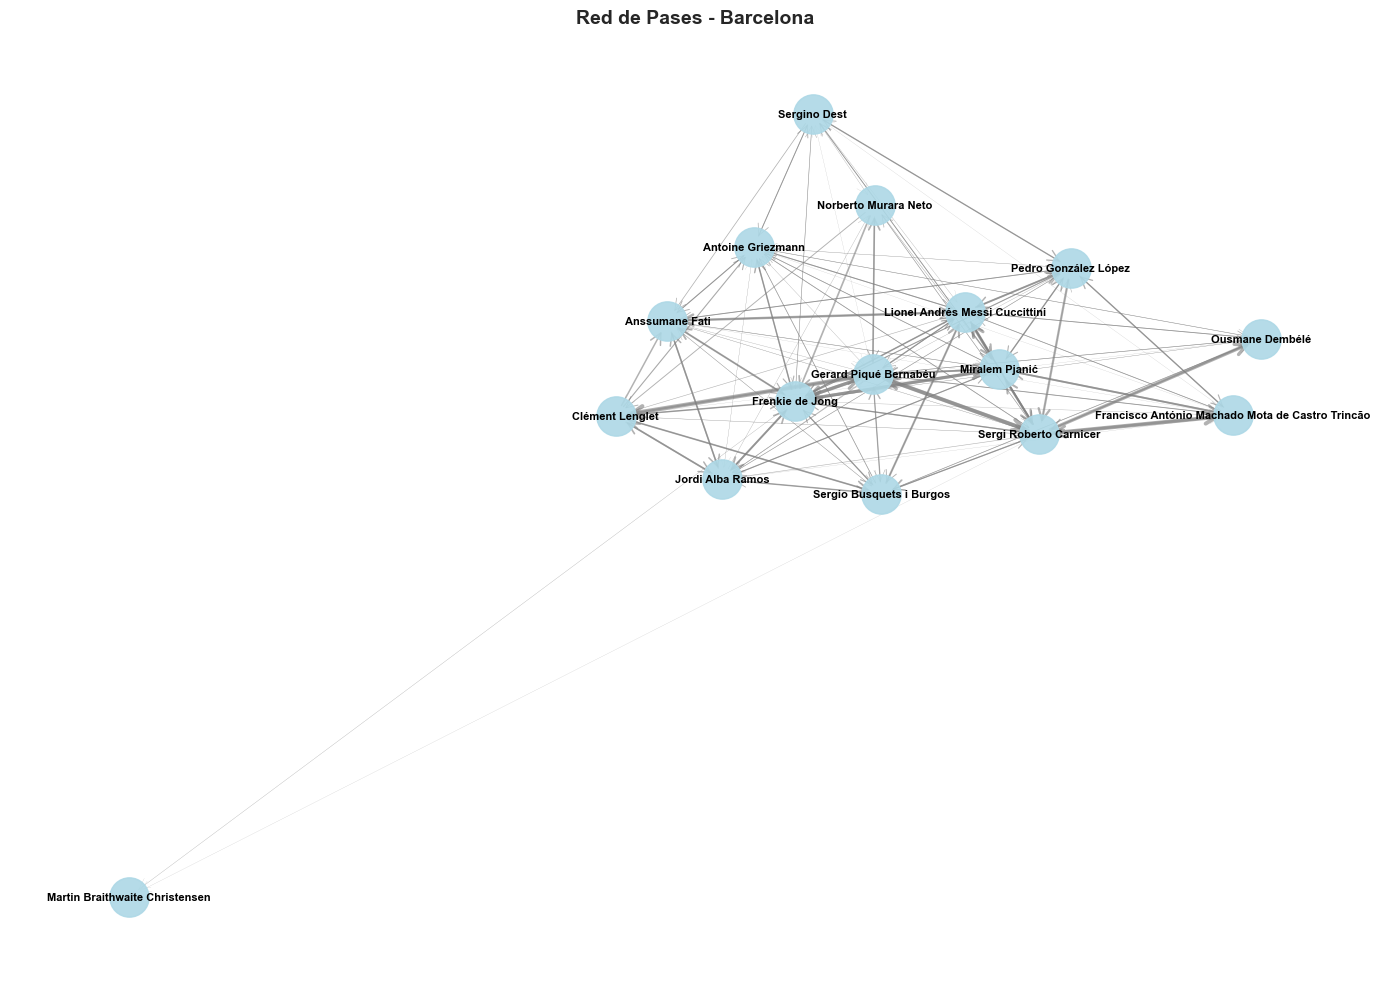

In [18]:
# Visualizar la red completa
pass_graph.visualize(
    figsize=(14, 10),
    node_size=800,
    with_labels=True,
    title="Red de Pases - Barcelona"
)

In [19]:
from src.graphs.network_metrics import NetworkMetrics

# Calcular métricas del grafo
metrics_calc = NetworkMetrics(G)
all_metrics = metrics_calc.calculate_all_metrics()

# Resumen
metrics_calc.print_summary()


🔬 CALCULANDO TODAS LAS MÉTRICAS DE RED

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas
📊 Calculando coeficiente de clustering...
✅ Clustering promedio: 0.1743
📊 Calculando distribución de grados...
✅ Grado promedio: 19.00
📊 Densidad del grafo: 0.6333

✅ TODAS LAS MÉTRICAS CALCULADAS


📊 RESUMEN DE MÉTRICAS DE RED
Número de jugadores: 16
Densidad del grafo: 0.6333

Grados promedio:
  - In-degree: 9.50
  - Out-degree: 9.50

Clustering promedio: 0.1743

Top 5 jugadores (PageRank):
  1. Frenkie de Jong: 0.1089
  2. Sergi Roberto Carnicer: 0.1071
  3. Lionel Andrés Messi Cuccittini: 0.0964
  4. Miralem Pjanić: 0.0922
  5. Gerard Piqué Bernabéu: 0.0863



In [20]:
# Identificar hubs con diferentes métricas
print("🎯 Jugadores clave según diferentes métricas:\n")

print("Por PageRank (importancia general):")
hubs_pagerank = metrics_calc.identify_hubs(n=5, metric='pagerank')

print("\nPor Betweenness (intermediación):")
hubs_betweenness = metrics_calc.identify_hubs(n=5, metric='betweenness')

print("\nPor Out-Degree (pases realizados):")
hubs_outdegree = metrics_calc.identify_hubs(n=5, metric='out_degree')

🎯 Jugadores clave según diferentes métricas:

Por PageRank (importancia general):

🎯 Top 5 hubs (por pagerank):
   1. Frenkie de Jong: 0.1089
   2. Sergi Roberto Carnicer: 0.1071
   3. Lionel Andrés Messi Cuccittini: 0.0964
   4. Miralem Pjanić: 0.0922
   5. Gerard Piqué Bernabéu: 0.0863

Por Betweenness (intermediación):

🎯 Top 5 hubs (por betweenness):
   1. Antoine Griezmann: 0.2676
   2. Sergino Dest: 0.2002
   3. Francisco António Machado Mota de Castro Trincão: 0.1556
   4. Frenkie de Jong: 0.1159
   5. Jordi Alba Ramos: 0.1028

Por Out-Degree (pases realizados):

🎯 Top 5 hubs (por out_degree):
   1. Frenkie de Jong: 14.0000
   2. Gerard Piqué Bernabéu: 13.0000
   3. Sergi Roberto Carnicer: 13.0000
   4. Antoine Griezmann: 12.0000
   5. Jordi Alba Ramos: 12.0000


In [21]:
# Crear DataFrame con todas las métricas
df_metrics = metrics_calc.create_metrics_dataframe()

print("📊 Métricas de todos los jugadores:")
print(f"Total de jugadores: {len(df_metrics)}\n")

# Mostrar top 10
print("Top 10 jugadores (por PageRank):")
display(df_metrics.head(10))

# Estadísticas descriptivas
print("\n📈 Estadísticas descriptivas de las métricas:")
display(df_metrics.describe())

📊 Métricas de todos los jugadores:
Total de jugadores: 16

Top 10 jugadores (por PageRank):


,player,in_degree,out_degree,total_degree,in_degree_centrality,out_degree_centrality,betweenness,closeness,pagerank,eigenvector,clustering
0,Frenkie de Jong,14,14,28,0.933333,0.933333,0.115873,0.375000,0.108914,0.362103,0.178093
1,Sergi Roberto Carnicer,13,13,26,0.866667,0.866667,0.095397,0.312500,0.107091,0.395233,0.170321
2,Lionel Andrés Messi Cuccittini,13,12,25,0.866667,0.800000,0.070238,0.319149,0.096375,0.346622,0.195781
3,Miralem Pjanić,11,11,22,0.733333,0.733333,0.004762,0.230769,0.092157,0.359750,0.242308
4,Gerard Piqué Bernabéu,13,13,26,0.866667,0.866667,0.066746,0.340909,0.086289,0.353871,0.167541
5,Anssumane Fati,10,10,20,0.666667,0.666667,0.088889,0.223881,0.069510,0.230309,0.183756
6,Pedro González López,10,10,20,0.666667,0.666667,0.003333,0.300000,0.063961,0.205117,0.184333
7,Antoine Griezmann,13,12,25,0.866667,0.800000,0.267619,0.365854,0.058997,0.185155,0.140682
8,Francisco António Machado Mota de Castro Trincão,8,7,15,0.533333,0.466667,0.155556,0.357143,0.054987,0.254812,0.180526
9,Sergio Busquets i Burgos,9,9,18,0.600000,0.600000,0.015794,0.245902,0.053708,0.179699,0.238571



📈 Estadísticas descriptivas de las métricas:


,in_degree,out_degree,total_degree,in_degree_centrality,out_degree_centrality,betweenness,closeness,pagerank,eigenvector,clustering
count,16.00000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,9.50000,9.500000,19.00000,0.633333,0.633333,0.087222,0.317958,0.062500,0.224037,0.174252
std,3.32666,3.425395,6.65332,0.221777,0.228360,0.072924,0.050192,0.029305,0.114577,0.038874
min,2.00000,1.000000,3.00000,0.133333,0.066667,0.003333,0.223881,0.011158,0.011310,0.086530
25%,7.75000,7.000000,15.00000,0.516667,0.466667,0.028948,0.309375,0.047662,0.170214,0.160604
50%,9.50000,10.000000,20.00000,0.633333,0.666667,0.082778,0.319149,0.056992,0.203916,0.178813
75%,13.00000,12.000000,25.00000,0.866667,0.800000,0.106052,0.344968,0.087756,0.348434,0.187195
max,14.00000,14.000000,28.00000,0.933333,0.933333,0.267619,0.405405,0.108914,0.395233,0.242308


In [22]:
# Analizar un jugador específico
top_player = df_metrics.iloc[0]['player']

print(f"🔍 Análisis detallado de: {top_player}\n")

player_metrics = metrics_calc.get_player_metrics(top_player)

for metric, value in player_metrics.items():
    print(f"  {metric.replace('_', ' ').title()}: {value:.4f}")

🔍 Análisis detallado de: Frenkie de Jong

  In Degree: 14.0000
  Out Degree: 14.0000
  Total Degree: 28.0000
  In Degree Centrality: 0.9333
  Out Degree Centrality: 0.9333
  Betweenness: 0.1159
  Closeness: 0.3750
  Pagerank: 0.1089
  Eigenvector: 0.3621
  Clustering: 0.1781


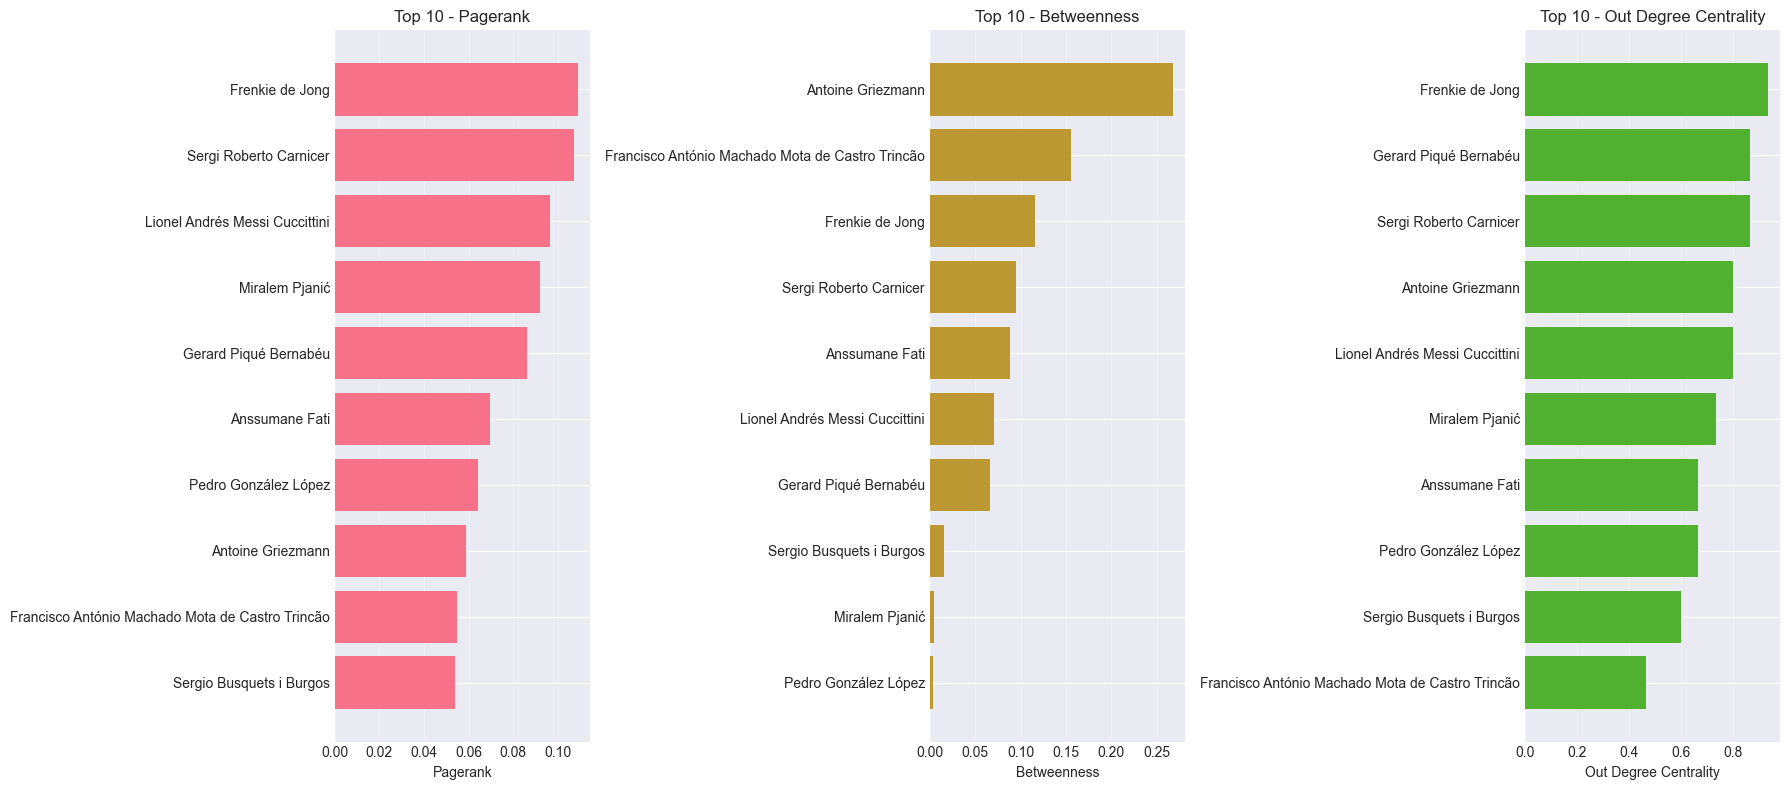

In [23]:
# Comparación de métricas de centralidad
metrics_calc.visualize_centrality_comparison(
    metrics=['pagerank', 'betweenness', 'out_degree_centrality'],
    top_n=10
)

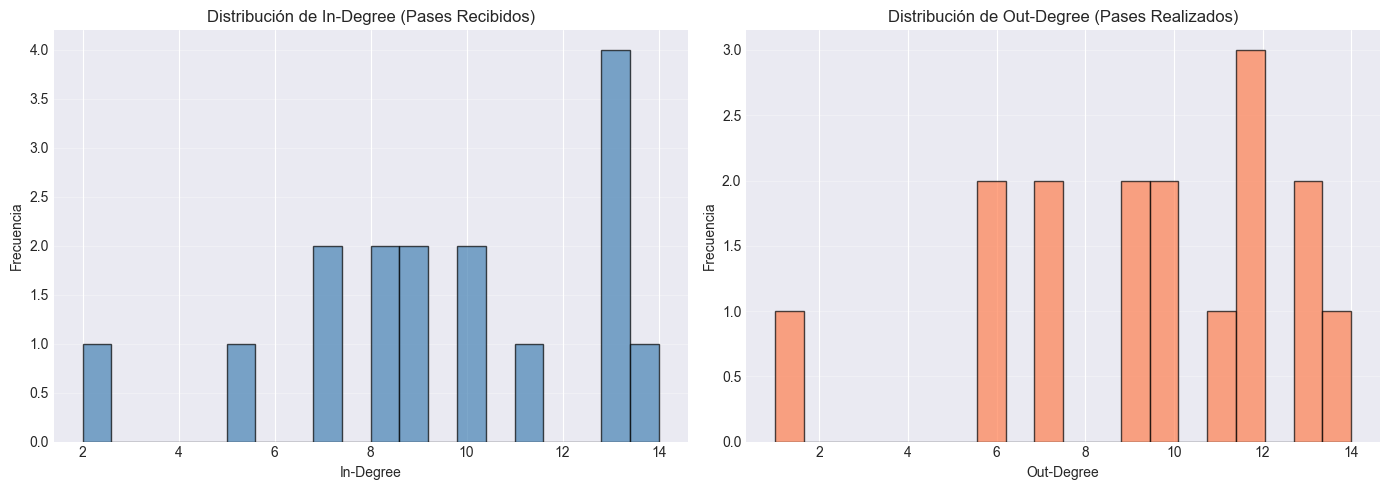

In [24]:
# Visualizar distribución de grados
metrics_calc.visualize_degree_distribution()

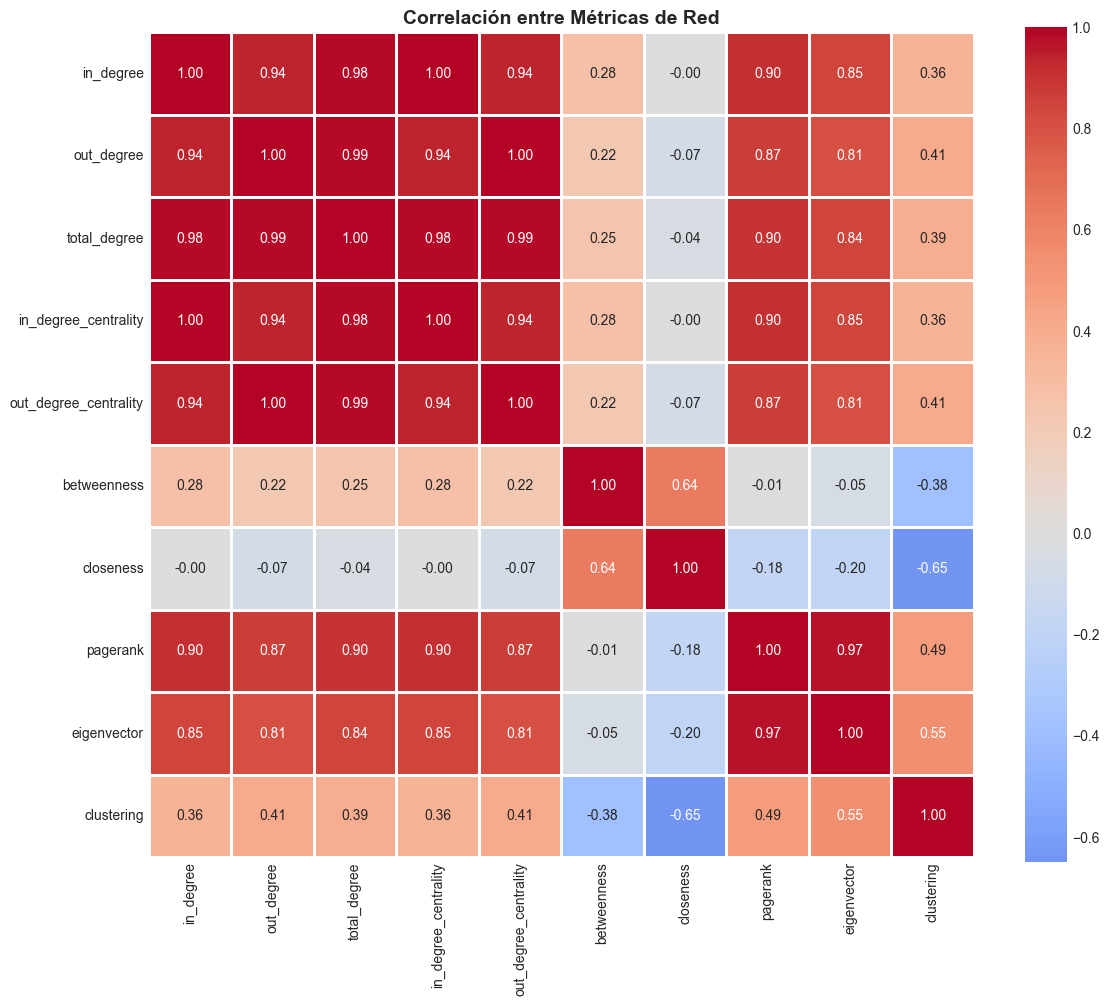

In [25]:
# Matriz de correlación entre métricas
metrics_calc.visualize_correlation_matrix()

In [26]:
# Exportar métricas a CSV
metrics_calc.export_metrics(f'data/processed/metrics_match_{match_id}.csv')

print("✅ Métricas exportadas exitosamente")

💾 Métricas exportadas a: data/processed/metrics_match_3773386.csv
✅ Métricas exportadas exitosamente


In [27]:
from src.graphs.dynamic_graph import DynamicPassGraph

# Crear grafos dinámicos (ventanas de 5 minutos con paso de 2 minutos)
dynamic_graph = DynamicPassGraph(window_size=5, step_size=2, weight_type='frequency')
graphs = dynamic_graph.build_dynamic_graphs(passes_clean, team='Barcelona')

# Resumen
dynamic_graph.print_summary()


🔨 Construyendo grafos dinámicos...
   Filtrando equipo: Barcelona
✅ Creadas 48 ventanas temporales
   - Tamaño de ventana: 5 min
   - Paso: 2 min

🔨 Construyendo grafo de pases (peso: frequency)...
✅ Grafo construido:
   - Nodos (jugadores): 10
   - Aristas (conexiones): 33

🔨 Construyendo grafo de pases (peso: frequency)...
✅ Grafo construido:
   - Nodos (jugadores): 11
   - Aristas (conexiones): 22

🔨 Construyendo grafo de pases (peso: frequency)...
✅ Grafo construido:
   - Nodos (jugadores): 11
   - Aristas (conexiones): 26

🔨 Construyendo grafo de pases (peso: frequency)...
✅ Grafo construido:
   - Nodos (jugadores): 11
   - Aristas (conexiones): 26

🔨 Construyendo grafo de pases (peso: frequency)...
✅ Grafo construido:
   - Nodos (jugadores): 11
   - Aristas (conexiones): 30

🔨 Construyendo grafo de pases (peso: frequency)...
✅ Grafo construido:
   - Nodos (jugadores): 11
   - Aristas (conexiones): 28

🔨 Construyendo grafo de pases (peso: frequency)...
✅ Grafo construido:
   - No

In [28]:
# Calcular métricas para cada ventana
temporal_metrics = dynamic_graph.calculate_temporal_metrics()

print("📊 Métricas temporales calculadas:")
print(f"Total de ventanas: {len(temporal_metrics)}\n")

# Mostrar primeras ventanas
print("Primeras 10 ventanas:")
display(temporal_metrics.head(10))

# Estadísticas
print("\n📈 Estadísticas de métricas temporales:")
display(temporal_metrics.describe())


📊 Calculando métricas temporales...

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas
📊 Calculando coeficiente de clustering...
✅ Clustering promedio: 0.2386

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas
📊 Calculando coeficiente de clustering...
✅ Clustering promedio: 0.1005

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas
📊 Calculando coeficiente de clustering...
✅ Clustering promedio: 0.0994

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas
📊 Calculando coeficiente de clustering...
✅ Clustering promedio: 0.1209

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas
📊 Calculando coeficiente de clustering...
✅ Clustering promedio: 0.2196

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas
📊 Calculando coeficiente de clustering...
✅ Clustering promedio: 0.3230

📊 Calculando métricas de centralidad...
✅ Métricas de centrali

,window_start,window_end,window_center,num_nodes,num_edges,density,avg_degree,avg_betweenness,avg_closeness,avg_pagerank,avg_clustering
0,0.0,5.0,2.5,10,33,0.366667,6.600000,0.124676,0.440701,0.100000,0.238608
1,2.0,7.0,4.5,11,22,0.200000,4.000000,0.131650,0.300917,0.090909,0.100496
2,4.0,9.0,6.5,11,26,0.236364,4.727273,0.116162,0.339154,0.090909,0.099370
3,6.0,11.0,8.5,11,26,0.236364,4.727273,0.135859,0.377814,0.090909,0.120944
4,8.0,13.0,10.5,11,30,0.272727,5.454545,0.120286,0.397085,0.090909,0.219559
5,10.0,15.0,12.5,11,28,0.254545,5.090909,0.126515,0.396519,0.090909,0.322984
6,12.0,17.0,14.5,11,28,0.254545,5.090909,0.104714,0.360489,0.090909,0.352536
7,14.0,19.0,16.5,11,36,0.327273,6.545455,0.126263,0.427069,0.090909,0.237072
8,16.0,21.0,18.5,11,35,0.318182,6.363636,0.093098,0.383083,0.090909,0.271462
9,18.0,23.0,20.5,10,24,0.266667,4.800000,0.143403,0.329539,0.100000,0.154086



📈 Estadísticas de métricas temporales:


,window_start,window_end,window_center,num_nodes,num_edges,density,avg_degree,avg_betweenness,avg_closeness,avg_pagerank,avg_clustering
count,48.0,48.0,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,47.0,52.0,49.5,10.437500,30.666667,0.309218,5.805830,0.116773,0.398787,0.097982,0.220617
std,28.0,28.0,28.0,1.382355,8.538607,0.065833,1.319669,0.019757,0.062106,0.018106,0.073190
min,0.0,5.0,2.5,5.000000,5.000000,0.154545,2.000000,0.073737,0.259184,0.071429,0.000000
25%,23.5,28.5,26.0,10.000000,26.000000,0.267560,5.172727,0.103356,0.372907,0.090909,0.175886
50%,47.0,52.0,49.5,11.000000,32.000000,0.313636,6.162338,0.116627,0.406221,0.090909,0.224014
75%,70.5,75.5,73.0,11.000000,36.000000,0.355556,6.545455,0.128762,0.437746,0.100000,0.269853
max,94.0,99.0,96.5,14.000000,48.000000,0.433333,7.818182,0.166667,0.520124,0.200000,0.353635


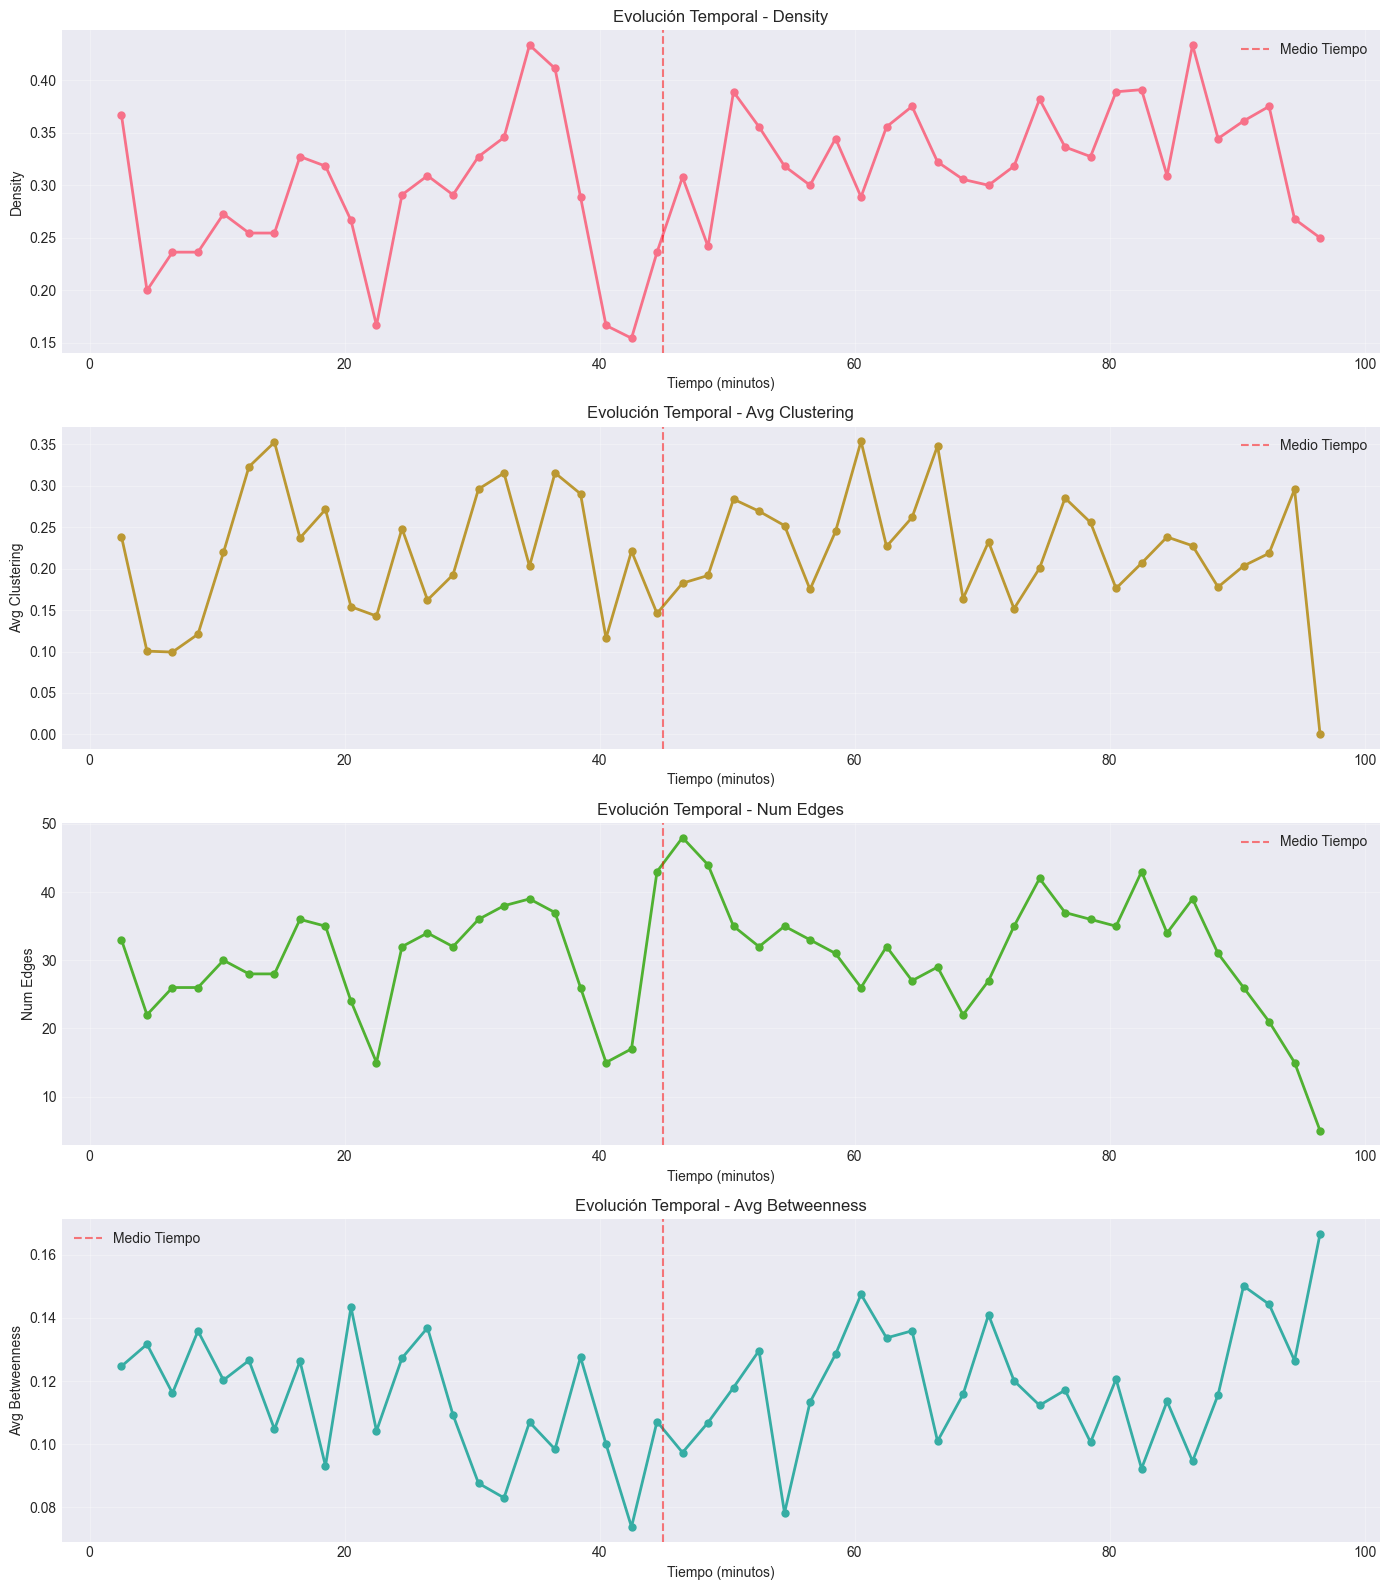

In [29]:
# Visualizar evolución de métricas clave
dynamic_graph.visualize_temporal_evolution([
    'density', 
    'avg_clustering', 
    'num_edges',
    'avg_betweenness'
])

In [30]:
# Detectar cambios significativos en diferentes métricas
print("🔍 DETECCIÓN DE CAMBIOS TÁCTICOS\n")

print("1. Cambios en densidad:")
changes_density = dynamic_graph.detect_tactical_changes(metric='density', threshold=0.15)

print("\n2. Cambios en clustering:")
changes_clustering = dynamic_graph.detect_tactical_changes(metric='avg_clustering', threshold=0.20)

print("\n3. Cambios en número de conexiones:")
changes_edges = dynamic_graph.detect_tactical_changes(metric='num_edges', threshold=0.15)

🔍 DETECCIÓN DE CAMBIOS TÁCTICOS

1. Cambios en densidad:

🔍 Cambios tácticos detectados (métrica: density, umbral: 0.15):
   Total: 22 cambios
   1. Minuto 4.5: 0.3667 → 0.2000 (-45.5%)
   2. Minuto 6.5: 0.2000 → 0.2364 (+18.2%)
   3. Minuto 10.5: 0.2364 → 0.2727 (+15.4%)
   4. Minuto 16.5: 0.2545 → 0.3273 (+28.6%)
   5. Minuto 20.5: 0.3182 → 0.2667 (-16.2%)
   6. Minuto 22.5: 0.2667 → 0.1667 (-37.5%)
   7. Minuto 24.5: 0.1667 → 0.2909 (+74.5%)
   8. Minuto 34.5: 0.3455 → 0.4333 (+25.4%)
   9. Minuto 38.5: 0.4111 → 0.2889 (-29.7%)
   10. Minuto 40.5: 0.2889 → 0.1667 (-42.3%)
   11. Minuto 44.5: 0.1545 → 0.2363 (+52.9%)
   12. Minuto 46.5: 0.2363 → 0.3077 (+30.2%)
   13. Minuto 48.5: 0.3077 → 0.2418 (-21.4%)
   14. Minuto 50.5: 0.2418 → 0.3889 (+60.9%)
   15. Minuto 60.5: 0.3444 → 0.2889 (-16.1%)
   16. Minuto 62.5: 0.2889 → 0.3556 (+23.1%)
   17. Minuto 74.5: 0.3182 → 0.3818 (+20.0%)
   18. Minuto 80.5: 0.3273 → 0.3889 (+18.8%)
   19. Minuto 84.5: 0.3909 → 0.3091 (-20.9%)
   20. Minuto


📊 COMPARACIÓN ENTRE MITADES

Density:
  Primera mitad: 0.2797
  Segunda mitad: 0.3342
  Diferencia: +0.0544 (+19.45%)

Avg Clustering:
  Primera mitad: 0.2167
  Segunda mitad: 0.2240
  Diferencia: +0.0073 (+3.37%)

Num Edges:
  Primera mitad: 29.6364
  Segunda mitad: 31.5385
  Diferencia: +1.9021 (+6.42%)

Avg Betweenness:
  Primera mitad: 0.1129
  Segunda mitad: 0.1200
  Diferencia: +0.0071 (+6.28%)



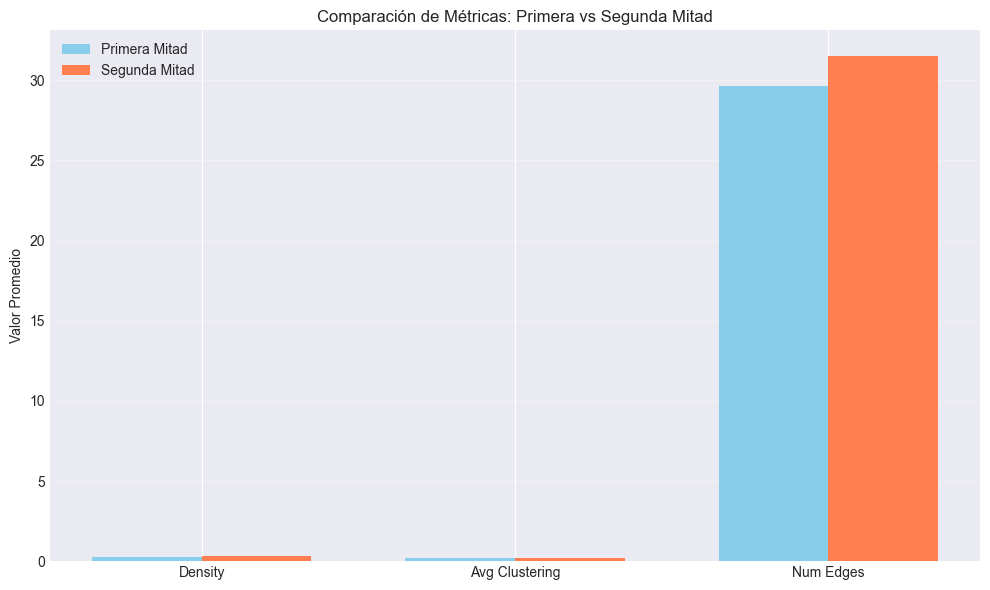

In [31]:
# Comparación entre mitades
comparison = dynamic_graph.compare_halves()

# Visualizar comparación
metrics_to_plot = ['density', 'avg_clustering', 'num_edges']
first_half_values = [comparison[m]['first_half_avg'] for m in metrics_to_plot]
second_half_values = [comparison[m]['second_half_avg'] for m in metrics_to_plot]

x = np.arange(len(metrics_to_plot))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, first_half_values, width, label='Primera Mitad', color='skyblue')
bars2 = ax.bar(x + width/2, second_half_values, width, label='Segunda Mitad', color='coral')

ax.set_ylabel('Valor Promedio')
ax.set_title('Comparación de Métricas: Primera vs Segunda Mitad')
ax.set_xticks(x)
ax.set_xticklabels([m.replace('_', ' ').title() for m in metrics_to_plot])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

📊 Evolución de importancia de top jugadores: Frenkie de Jong, Sergi Roberto Carnicer, Lionel Andrés Messi Cuccittini


📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas d

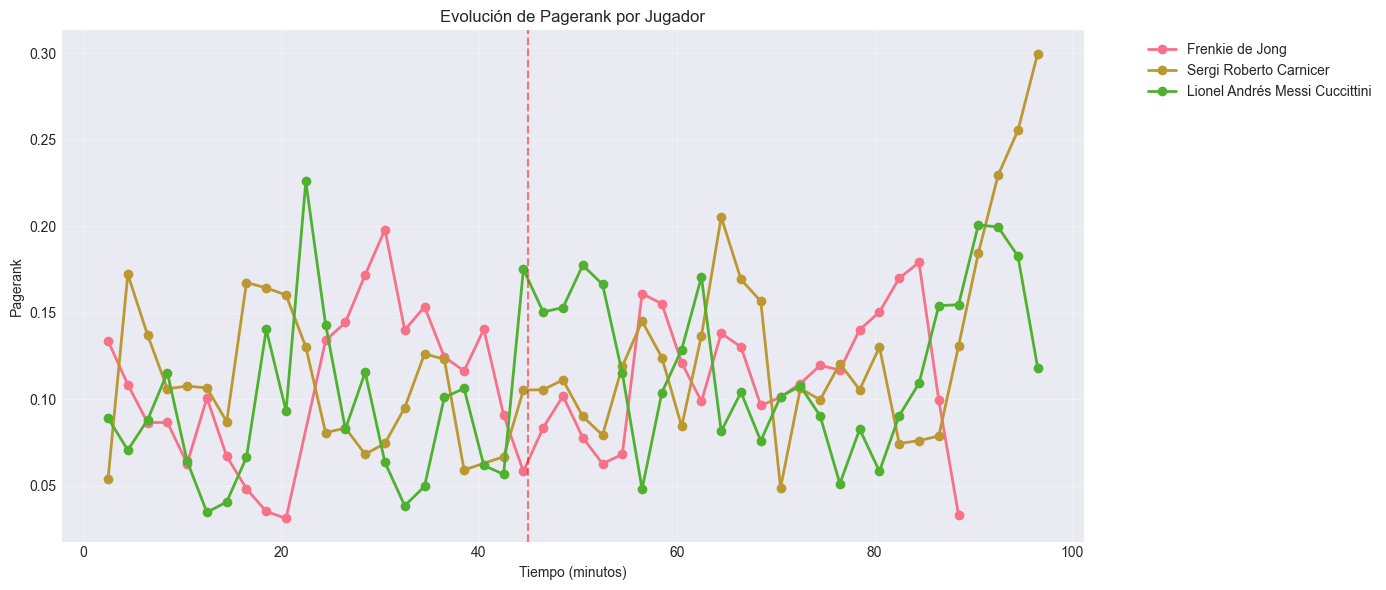

In [32]:
# Analizar evolución de los top 3 jugadores
top_players = df_metrics.head(3)['player'].tolist()

print(f"📊 Evolución de importancia de top jugadores: {', '.join(top_players)}\n")

# Visualizar evolución
dynamic_graph.visualize_player_importance_evolution(
    players=top_players,
    metric='pagerank'
)

🔍 Evolución detallada de: Frenkie de Jong


📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métricas de centralidad...
✅ Métricas de centralidad calculadas

📊 Calculando métrica

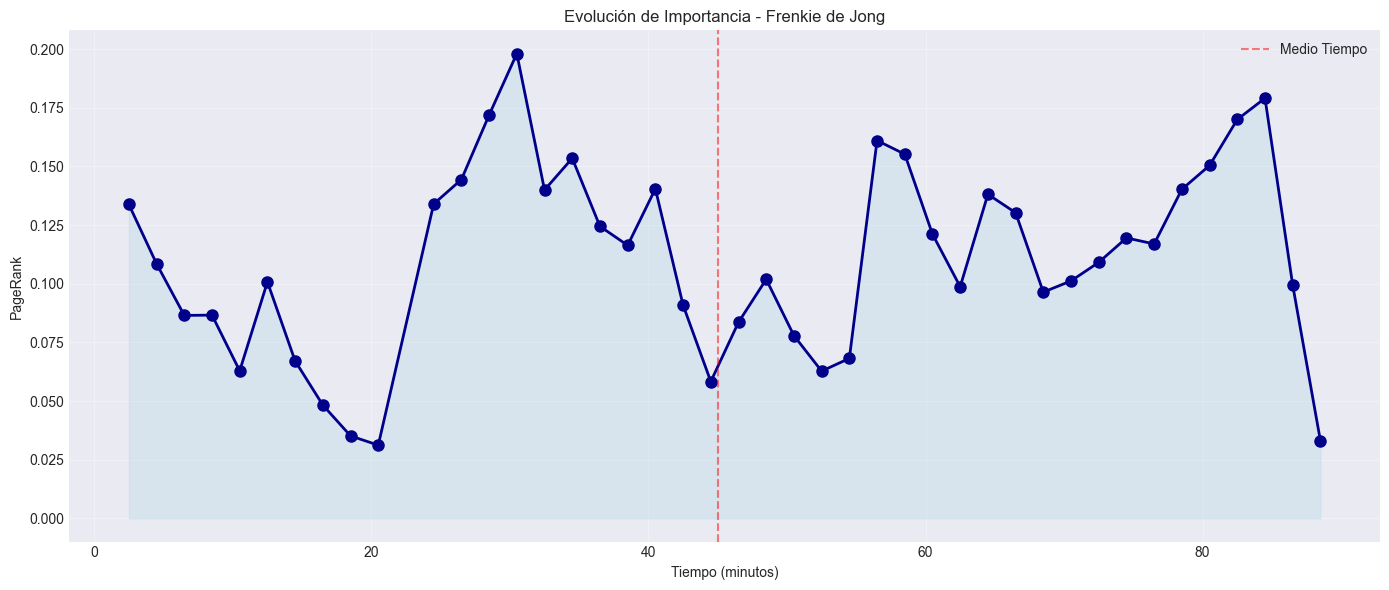

Estadísticas de importancia:
  - Promedio: 0.1104
  - Máximo: 0.1981 (min 30.5)
  - Mínimo: 0.0312 (min 20.5)


In [33]:
# Analizar evolución de un jugador específico
player_name = top_players[0]  # El jugador más importante

print(f"🔍 Evolución detallada de: {player_name}\n")

player_evolution = dynamic_graph.get_player_temporal_importance(player_name, metric='pagerank')

# Visualizar
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(player_evolution['time'], player_evolution['metric_value'], 
        marker='o', linewidth=2, markersize=8, color='darkblue')
ax.fill_between(player_evolution['time'], player_evolution['metric_value'], 
                alpha=0.3, color='lightblue')
ax.set_xlabel('Tiempo (minutos)')
ax.set_ylabel('PageRank')
ax.set_title(f'Evolución de Importancia - {player_name}')
ax.grid(True, alpha=0.3)
ax.axvline(x=45, color='red', linestyle='--', alpha=0.5, label='Medio Tiempo')
ax.legend()
plt.tight_layout()
plt.show()

# Estadísticas
print(f"Estadísticas de importancia:")
print(f"  - Promedio: {player_evolution['metric_value'].mean():.4f}")
print(f"  - Máximo: {player_evolution['metric_value'].max():.4f} (min {player_evolution.loc[player_evolution['metric_value'].idxmax(), 'time']:.1f})")
print(f"  - Mínimo: {player_evolution['metric_value'].min():.4f} (min {player_evolution.loc[player_evolution['metric_value'].idxmin(), 'time']:.1f})")

In [34]:
# Exportar métricas temporales
dynamic_graph.export_temporal_metrics(f'data/processed/temporal_metrics_match_{match_id}.csv')

print("✅ Análisis de grafos dinámicos completado")

💾 Métricas temporales exportadas a: data/processed/temporal_metrics_match_3773386.csv
✅ Análisis de grafos dinámicos completado
